### Boxplot

- 매일 투자한다고 가정 (일별 데이터)
- without loss event
- after returns(5~120, 5일간격) 구하기

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2014-01-01'
end_date = '2024-03-22'

data = yf.download('SPY', start = start_date, end = end_date)

data['Returns'] = data['Adj Close'].pct_change()
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed


In [57]:
data.index = pd.to_datetime(
    data.index.strftime('%Y-%m-%d')
)

In [58]:
return_data = pd.DataFrame(index = data.index)

In [59]:
import warnings
warnings.filterwarnings('ignore')
for i in range(5, 125, 5) :
    return_data[str(i) + 'days_return'] = (data['Adj Close'].shift(-i) - data['Adj Close']) / data['Adj Close'].shift(-i)

In [60]:
return_data

,5days_return,10days_return,15days_return,20days_return,25days_return,30days_return,35days_return,40days_return,45days_return,50days_return,...,75days_return,80days_return,85days_return,90days_return,95days_return,100days_return,105days_return,110days_return,115days_return,120days_return
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,0.003921,0.008134,-0.022528,-0.026602,-0.018032,0.005978,0.010762,0.011136,0.027849,0.018301,...,0.030730,0.030007,0.024969,0.041292,0.028972,0.048405,0.057320,0.065687,0.072067,0.073281
2014-01-03,0.006789,0.004084,-0.027414,-0.050066,-0.015999,0.007328,0.010550,0.025003,0.023180,0.025419,...,0.028614,0.033050,0.030837,0.036886,0.037243,0.053458,0.063583,0.059180,0.073258,0.072769
2014-01-06,-0.003688,0.009881,-0.018372,-0.039740,-0.002088,0.003606,0.013470,0.028708,0.026271,0.023037,...,0.033388,0.035954,0.032616,0.031170,0.042362,0.057719,0.070740,0.064757,0.077816,0.077250
2014-01-07,0.001035,0.004450,-0.034564,-0.047439,-0.007744,0.003368,0.012593,0.024976,0.009180,0.022743,...,0.019412,0.028641,0.028125,0.028590,0.040327,0.053013,0.065990,0.059788,0.071868,0.071109
2014-01-08,0.006174,-0.003994,-0.023936,-0.034032,-0.002787,0.002012,0.014870,0.025178,0.006174,0.018724,...,0.022295,0.030286,0.037285,0.031930,0.045982,0.052316,0.065881,0.062190,0.066039,0.077083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


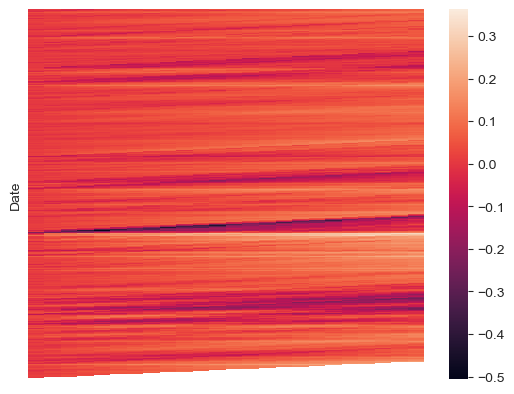

In [61]:
import seaborn as sns
sns.heatmap(return_data)
plt.grid(False)
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)
plt.show()

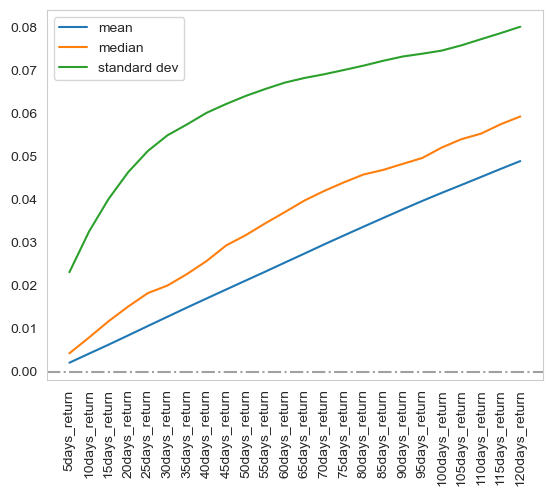

In [77]:
plt.plot(
    return_data.mean(axis = 0), label = 'mean'
)
plt.plot(
    return_data.median(axis = 0), label = 'median'
)
plt.plot(return_data.std(axis = 0), label = 'standard dev')
plt.grid(False)
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.show()

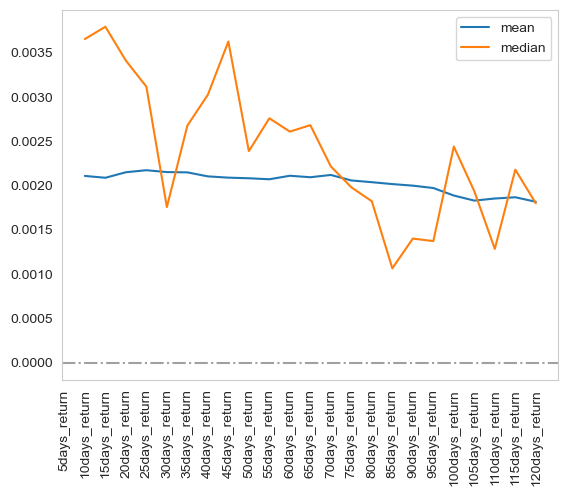

In [129]:
plt.plot(
    return_data.mean(axis = 0).diff(), label = 'mean'
)
plt.plot(
    return_data.median(axis = 0).diff(), label = 'median'
)
#plt.plot(return_data.std(axis = 0).diff(), label = 'standard dev')
plt.grid(False)
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.show()

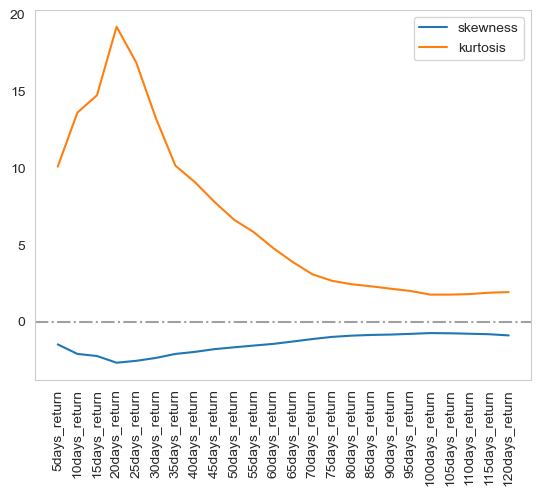

In [69]:
plt.plot(return_data.skew(axis = 0), label = 'skewness')
plt.plot(return_data.kurt(axis = 0), label = 'kurtosis')
plt.grid(False)
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.show()

In [85]:
def hyperskew(data):
    mean = np.mean(data)
    variance = np.var(data)
    n = len(data)
    sum_5th_power_diff = np.sum((data - mean) ** 5)
    mean_5th_power_diff = sum_5th_power_diff / n
    normalized_moment = mean_5th_power_diff / (variance ** (5 / 2))
    return normalized_moment

def hyperkurto(data):
    mean = np.mean(data)
    variance = np.var(data)
    n = len(data)
    sum_6th_power_diff = np.sum((data - mean) ** 6)
    mean_6th_power_diff = sum_6th_power_diff / n
    normalized_moment = mean_6th_power_diff / (variance ** 3)
    return normalized_moment

In [88]:
hyperskewness = []
for i in return_data.columns :
    hyperskewness.append(hyperskew(return_data[i]))

In [89]:
hyperkurtosis = []
for i in return_data.columns :
    hyperkurtosis.append(hyperkurto(return_data[i]))

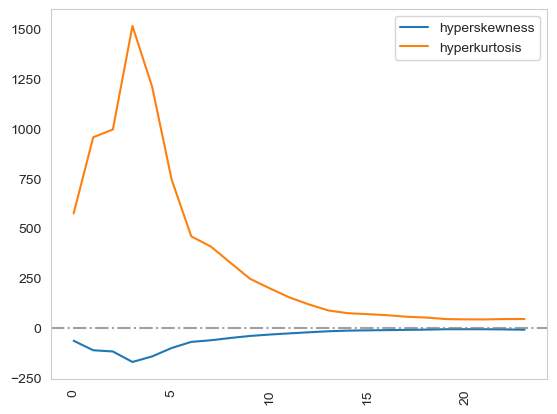

In [92]:
plt.plot(hyperskewness, label = 'hyperskewness')
plt.plot(hyperkurtosis, label = 'hyperkurtosis')

plt.grid(False)
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.show()

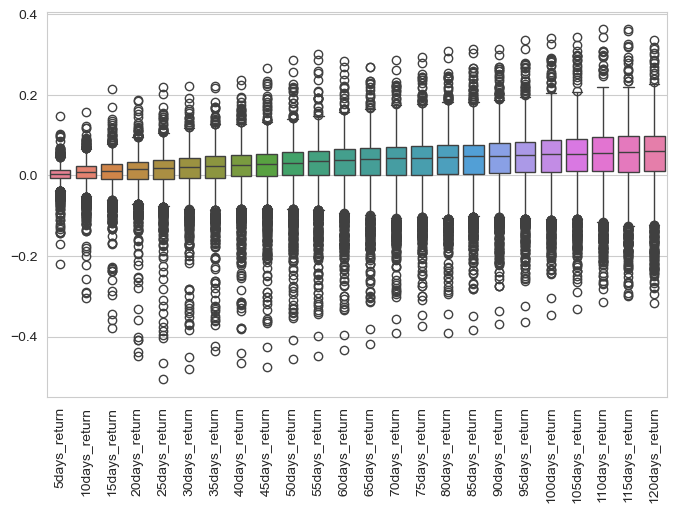

In [98]:
plt.figure(figsize = (8, 5))
sns.boxplot(data = return_data)
plt.xticks(rotation = 90)
plt.show()

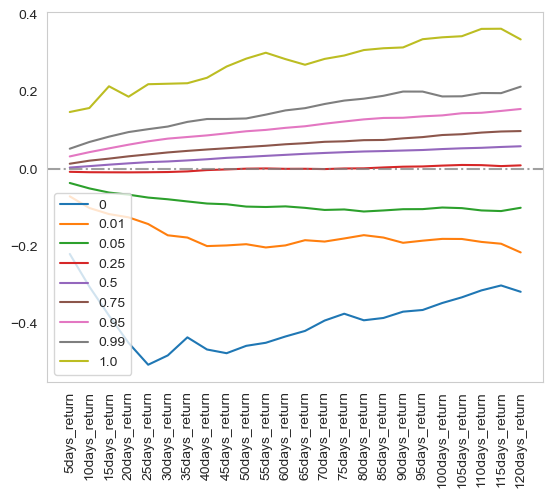

In [109]:
plt.plot(
    return_data.quantile([0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.0]).T
)
plt.grid(False)
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.legend([0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.0])
plt.show()

<Axes: >

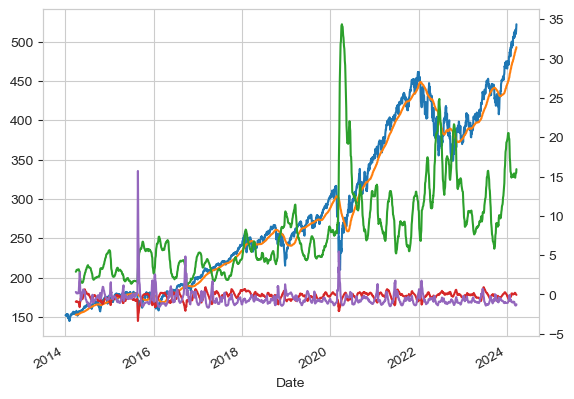

In [122]:
data['Adj Close'].plot()
data['Adj Close'].rolling(window = 60).mean().plot()
data['Adj Close'].rolling(window = 60).std().plot(secondary_y = True)
data['Adj Close'].rolling(window = 60).skew().plot(secondary_y = True)
data['Adj Close'].rolling(window = 60).kurt().plot(secondary_y = True)



<Axes: xlabel='Date'>

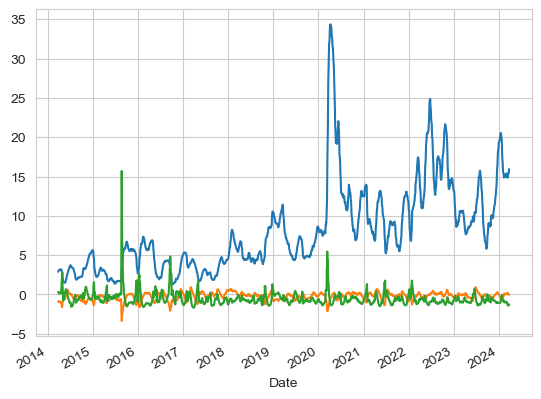

In [119]:
data['Adj Close'].rolling(window = 60).std().plot()
data['Adj Close'].rolling(window = 60).skew().plot()
data['Adj Close'].rolling(window = 60).kurt().plot()